In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
z = torch.empty(5,3)
print(z)

tensor([[8.9082e-39, 1.0194e-38, 9.1837e-39],
        [8.4490e-39, 1.0102e-38, 1.0561e-38],
        [1.0286e-38, 1.0653e-38, 1.0469e-38],
        [9.5510e-39, 9.9184e-39, 9.0000e-39],
        [1.0561e-38, 1.0653e-38, 4.1327e-39]])


In [5]:
z = torch.rand(5, 3)
print(z)

tensor([[0.7156, 0.7679, 0.4290],
        [0.0422, 0.3650, 0.5163],
        [0.9172, 0.1827, 0.3076],
        [0.5076, 0.9707, 0.2018],
        [0.1531, 0.5534, 0.5950]])


In [6]:
z = torch.zeros(5, 3)
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [7]:
z = torch.Tensor([5, 3])
print(z.dtype)

torch.float32


In [8]:
z = torch.tensor([5, 3])
print(z.dtype)

torch.int64


In [9]:
z = z.new_ones(5, 3, dtype = torch.double)
print(z)

z = torch.randn_like(z, dtype = torch.float)
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.6517,  0.0588,  0.0237],
        [-0.4601, -1.5481,  0.6791],
        [-0.5927,  0.0316, -0.0148],
        [-0.7213, -1.7746, -1.6397],
        [ 0.0620, -0.1541, -1.6757]])


## Operations

In [10]:
y = torch.rand(5, 3)
print(z + y)

tensor([[ 0.1943,  0.4922,  0.9399],
        [ 0.1469, -1.5406,  1.2269],
        [-0.3336,  0.5421,  0.3312],
        [-0.2896, -1.0703, -1.0022],
        [ 0.2635,  0.5663, -0.8711]])


In [11]:
print(torch.add(z, y))

tensor([[ 0.1943,  0.4922,  0.9399],
        [ 0.1469, -1.5406,  1.2269],
        [-0.3336,  0.5421,  0.3312],
        [-0.2896, -1.0703, -1.0022],
        [ 0.2635,  0.5663, -0.8711]])


In [12]:
result = torch.empty(5, 3)
torch.add(z, y, out = result)
print(result)

tensor([[ 0.1943,  0.4922,  0.9399],
        [ 0.1469, -1.5406,  1.2269],
        [-0.3336,  0.5421,  0.3312],
        [-0.2896, -1.0703, -1.0022],
        [ 0.2635,  0.5663, -0.8711]])


In [13]:
print(z)

tensor([[-0.6517,  0.0588,  0.0237],
        [-0.4601, -1.5481,  0.6791],
        [-0.5927,  0.0316, -0.0148],
        [-0.7213, -1.7746, -1.6397],
        [ 0.0620, -0.1541, -1.6757]])


In [14]:
print(z[:, 1])

tensor([ 0.0588, -1.5481,  0.0316, -1.7746, -0.1541])


In [15]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) #-1可以自动推断
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [16]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.3128])
0.3128473460674286


In [17]:
# 任何使张量就地变化的操作都用固定_。例如：x.copy_(y)将改变x

## NumPy Bridge

In [18]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [19]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [20]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


## Converting NumPy Array to Torch Tensor

In [21]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out = a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd

In [22]:
x = torch.ones(2, 2, requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [23]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [30]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [25]:
temp = torch.ones(2, 2)

In [26]:
z.backward(temp)

In [27]:
z.retain_grad

<function Tensor.retain_grad>

In [28]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.grad_fn)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

None
False
True


## Gradients

In [31]:
out.backward()

In [32]:
print(x.retain_grad)

<built-in method retain_grad of Tensor object at 0x000001A92F593688>


In [33]:
x = torch.randn(3, requires_grad = True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(y)

tensor([   24.7546, -1767.3644,   653.8400], grad_fn=<MulBackward0>)


In [34]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
y.backward(v)

print(x.retain_grad)

<built-in method retain_grad of Tensor object at 0x000001A92F5EF548>


In [35]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [36]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


In [37]:
torch.randn(5, 1, 32, 32).shape

torch.Size([5, 1, 32, 32])

## Neural Network

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [40]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [41]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [42]:
Input = torch.randn(1, 1, 32, 32)
out = net(Input)
print(out)

tensor([[ 0.0652,  0.0618, -0.1300, -0.1046, -0.0784,  0.0676,  0.1247, -0.0670,
          0.0142,  0.0644]], grad_fn=<AddmmBackward0>)


In [43]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [44]:
output = net(Input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

In [45]:
loss = criterion(output, target)
print(loss)

tensor(0.6416, grad_fn=<MseLossBackward0>)


In [46]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [47]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0081,  0.0113, -0.0111, -0.0012,  0.0047, -0.0080])


In [48]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(learning_rate * f.grad.data)

In [49]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.01)

optimizer.zero_grad()
output = net(Input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## Training a classifier

In [53]:
import torch
import torchvision
import torchvision.transforms as transforms

In [54]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')    

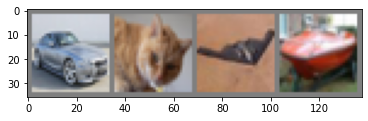

  car   cat plane  ship


In [55]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [56]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [57]:
net = Net()

In [58]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [59]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.221
[1,  4000] loss: 1.844
[1,  6000] loss: 1.674
[1,  8000] loss: 1.606
[1, 10000] loss: 1.507
[1, 12000] loss: 1.453
[2,  2000] loss: 1.411
[2,  4000] loss: 1.361
[2,  6000] loss: 1.328
[2,  8000] loss: 1.325
[2, 10000] loss: 1.286
[2, 12000] loss: 1.275
Finished Training


In [60]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

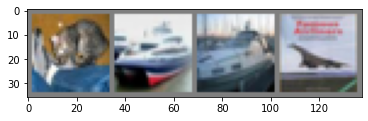

GroundTruth:    cat  ship  ship plane


In [73]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [62]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [63]:
outputs = net(images)

In [64]:
_,predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [65]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [66]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 71.1 %
Accuracy for class car   is: 70.2 %
Accuracy for class bird  is: 27.3 %
Accuracy for class cat   is: 48.5 %
Accuracy for class deer  is: 53.6 %
Accuracy for class dog   is: 27.8 %
Accuracy for class frog  is: 52.4 %
Accuracy for class horse is: 70.3 %
Accuracy for class ship  is: 63.3 %
Accuracy for class truck is: 71.1 %


In [67]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [68]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [69]:
inputs, labels = data[0].to(device), data[1].to(device)

In [70]:
net = Net()
if torch.cuda.device_count() > 1:
      print("Let's use", torch.cuda.device_count(), "GPUs!")
      # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
      net = nn.DataParallel(net)

net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [71]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [72]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.239
[1,  4000] loss: 1.944
[1,  6000] loss: 1.708
[1,  8000] loss: 1.597
[1, 10000] loss: 1.499
[1, 12000] loss: 1.450
[2,  2000] loss: 1.378
[2,  4000] loss: 1.368
[2,  6000] loss: 1.376
[2,  8000] loss: 1.320
[2, 10000] loss: 1.318
[2, 12000] loss: 1.299
Finished Training
